# NN Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Pre-processing

In [2]:
file_path = "./data/features_30_sec.csv"

Load the dataset:

In [3]:
df = pd.read_csv(file_path)

Set the correct datatypes:

In [4]:
dtypes = {col:np.float32 for col in df.columns}
dtypes["filename"] = "string"
dtypes["length"] = np.int32
dtypes["label"] = "category"
df = df.astype(dtypes)

## Data Normalization

Mean and the standard deviation should be computed w.r.t. the training set only:

In [5]:
df_labels = df['label']
df= df.drop(['filename', 'length', 'label'], axis=1)

In [6]:
mean = df.mean()
std = df.std()

Check the results:

In [7]:
df_norm = (df - mean) / std
df_norm.describe()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1.000000e+03,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.144409e-07,-1.144409e-07,-2.937317e-07,-7.629395e-09,-1.602173e-07,-3.814697e-08,1.068115e-07,0.000000,0.000000,-4.577637e-08,...,1.144409e-08,-7.629394e-08,-7.629395e-09,-1.525879e-08,1.144409e-08,2.288818e-08,-7.247925e-08,1.106262e-07,-1.525879e-08,1.106262e-07
std,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,9.999999e-01,1.000000e+00,1.000000e+00,1.000000,1.000000,9.999999e-01,...,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00
min,-2.530356e+00,-5.401806e+00,-1.913023e+00,-8.383836e-01,-2.279093e+00,-1.151861e+00,-2.554499e+00,-1.309327,-2.427247,-1.283895e+00,...,-3.678135e+00,-1.526307e+00,-2.916392e+00,-1.454699e+00,-3.223326e+00,-1.403757e+00,-4.306013e+00,-1.418825e+00,-4.908588e+00,-1.374565e+00
25%,-7.235815e-01,-5.225500e-01,-6.740337e-01,-5.804838e-01,-8.018369e-01,-7.117521e-01,-6.370699e-01,-0.722639,-0.756595,-7.519650e-01,...,-6.576672e-01,-6.025264e-01,-7.123985e-01,-6.512333e-01,-6.499466e-01,-6.345084e-01,-6.214566e-01,-6.596364e-01,-5.925577e-01,-6.136224e-01
50%,5.466284e-02,3.552591e-02,-1.292049e-01,-3.397881e-01,1.045037e-02,-3.272776e-01,-4.018151e-02,-0.260240,0.055230,-2.583919e-01,...,1.412219e-02,-2.488277e-01,-2.188645e-02,-2.364440e-01,4.185635e-02,-2.589298e-01,-1.733281e-02,-2.369591e-01,-1.848864e-02,-2.418822e-01
75%,7.008155e-01,6.354881e-01,6.813392e-01,1.446294e-01,6.837160e-01,3.553417e-01,6.382640e-01,0.469567,0.611040,4.988592e-01,...,7.013660e-01,3.244571e-01,6.873626e-01,3.705950e-01,6.749662e-01,3.393190e-01,6.601070e-01,3.334133e-01,6.275629e-01,3.371608e-01
max,3.488200e+00,2.814582e+00,4.065637e+00,6.776195e+00,3.119534e+00,6.403479e+00,2.407497e+00,5.781990,2.607408,4.783263e+00,...,2.688174e+00,9.833695e+00,3.395605e+00,1.025788e+01,3.846030e+00,7.824924e+00,4.532450e+00,8.794439e+00,4.291099e+00,9.638590e+00


## Data shuffling

In [8]:
np.random.seed(0)
df_norm['label'] = df_labels
df_norm_numpy = df_norm.to_numpy()
np.random.shuffle(df_norm_numpy)

In [9]:
X = df_norm_numpy[:, :-1]
X = X.astype(np.float32)
X.shape

(1000, 57)

In [10]:
labels = df_norm_numpy[:,-1]
labels.shape

(1000,)

## Label pre-processing

We create a one-hot representation of the labels, i.e. a matrix where each row corresponds to a class. 

The entries of the matrix are 1 if the sample corresponds to that digit, 0 otherwise.

In [11]:
unique_labels = np.array(['blues', 'classical', 'country', 'disco', 'hiphop',
                          'jazz', 'metal', 'pop', 'reggae', 'rock'])

In [12]:
y = np.zeros((1000, 10))
for i in range(1000):
    y[i, unique_labels == labels[i]] = 1

Check that the matrix was build correctly:

In [13]:
row_sums = np.sum(y, axis = 1)
row_sums.min(), row_sums.max()

(1.0, 1.0)

## Train-validation split

Split the data into training set and validation set:

In [14]:
# Split threshold
num_train = int(len(y) * 0.8)

# Training
X_train = X[:num_train, :]
y_train = y[:num_train, :]

# Validation
X_valid = X[num_train:, :]
y_valid = y[num_train:, :]

# Neural Network setup

In [15]:
import jax
import jax.numpy as jnp
from tqdm.notebook import trange

We have 57 input features, therefore the input layer will consist in 57 neurons.

There are 10 classes, therefore we will need 10 output neurons.

Given that this is a classification problem, we will also add a softmax layer.

In [16]:
X.shape, y.shape

((1000, 57), (1000, 10))

Paramaters are initialized with the [Glorot, Bengio 2010](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf) method:

In [17]:
def initialize_params(layers_size):
    np.random.seed(0)
    params = list()
    num_layers = len(layers_size) - 1

    for i in range(num_layers):
        std = np.sqrt(2 / (layers_size[i+1] +  layers_size[i]))
        W = np.random.randn(layers_size[i+1], layers_size[i]) * std
        b = np.zeros((layers_size[i+1], 1))

        params.append(W)
        params.append(b)
        
    return params

Fully-connected NN:

In [18]:
# Hyperbolic tangent
# jnp.tanh(layer)

# Leaky ReLU
a = 0.01
# jnp.maximum(a*layer, layer)  

# Exponential LU
# a = 0.1
# a*(layer<0)*(jnp.exp(layer) - 1) + (layer>=0)*layer  

def ANN(x, params):
    layers_num = int((len(params) / 2) + 1)
    weights = params[0::2] 
    biases = params[1::2]

    # Input layer
    layer = x.T

    # Hidden layers
    for i in range(layers_num - 1):
        # print(f'W:{weights[i].shape} - layer:{layer.shape} - b:{biases[i].shape}')
        layer = weights[i] @ layer - biases[i]

        # Activation function in all layers except the last one
        if i < layers_num - 2:
            layer = jnp.tanh(layer) 

    # Softmax layer
    layer_exp = jnp.exp(layer)
    layer = layer_exp / jnp.sum(layer_exp, axis=0)

    return layer.T

Test the network:

In [19]:
layers_size = [57, 48, 32, 16, 10]
params = initialize_params(layers_size)
x = X_train[0,:]
x = x[np.newaxis]
y_pred = ANN(x, params)
y_pred.shape

(1, 10)

# Loss function

Given that we are working on a classification problem, we will use the cross-entropy loss function.

In [20]:
def crossentropy(x, y, params):
    y_pred = ANN(x, params)
    return -jnp.mean(jnp.sum(y * jnp.log(y_pred), axis=1))

def MSW(params):
  weights = params[0::2]
  partial_sum = 0.0
  n_weights = 0

  for W in weights:
    partial_sum += jnp.sum(W**2)
    n_weights += W.shape[0] * W.shape[1]
  return partial_sum / n_weights

def loss(x, y, params, penalization):
  return MSE(x, y, params) + penalization * MSW(params)

print(MSW(params))
print(loss(x_train, y_train, params, 1.0))We regualizare the weights by implementing an $l^2$ regularization term for the ANN weights:
$$
\mathrm{MSW} = \frac{1}{n_{weights}} \sum_{i=1}^{n_{weights}} w_i^2
$$

In [21]:
def MSW(params):
    weights = params[0::2]
    partial_sum = 0.0
    n_weights = 0

    for W in weights:
        partial_sum += jnp.sum(W**2)
        n_weights += W.shape[0] * W.shape[1]
    return partial_sum / n_weights

The loss function will be: $\mathcal{L} = \mathrm{MSE} + \beta \, \mathrm{MSW}$
where $\beta$ is a suitable penalization parameter.

In [22]:
def loss(x, y, params, penalization):
    return crossentropy(x, y, params) + penalization * MSW(params)

We will keep track of the performance of the model using the accuracy.

In [23]:
def accuracy(x, y, params):
    y_pred = ANN(x, params)
    labels = jnp.argmax(y, axis=1)
    labels_pred = jnp.argmax(y_pred, axis=1)
    return jnp.mean(labels == labels_pred)

We compute the gradient of the loss function using `jax`.

In [24]:
grad = jax.grad(loss, argnums=2)

We compile the functions exploiting JIT to speed up the computation.

In [25]:
crossentropy_jit = jax.jit(crossentropy)
loss_jit = jax.jit(loss)
acc_jit = jax.jit(accuracy)
grad_jit = jax.jit(grad)

# Interactive plotting setup

In [26]:
from IPython import display
import time

class Callback:
    def __init__(self, refresh_rate = 250):
        self.refresh_rate = refresh_rate
        self.fig, self.axs = plt.subplots(1, figsize=(16,8))
        self.epoch = 0
        self.__call__(-1)

    def __call__(self, epoch):
        self.epoch = epoch
        if (epoch + 1) % self.refresh_rate == 0:
            self.draw()
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(1e-16)

    def draw(self):
        if self.epoch > 0:
            self.axs.clear()
            epochs = np.arange(1,len(history_train) + 1)
            self.axs.loglog(epochs, history_train, label = 'Train')
            self.axs.loglog(epochs, history_valid, label = 'Validation')
            self.axs.loglog(epochs, history_acc, label = 'Accuracy')

            self.axs.legend()
            self.axs.set_title(f'Epoch: {self.epoch + 1} - Accuracy: {history_acc[-1]:.2%}')

# Training

We train the NN using RMSProp.

In [27]:
jax.config.update('jax_platform_name', 'cpu')

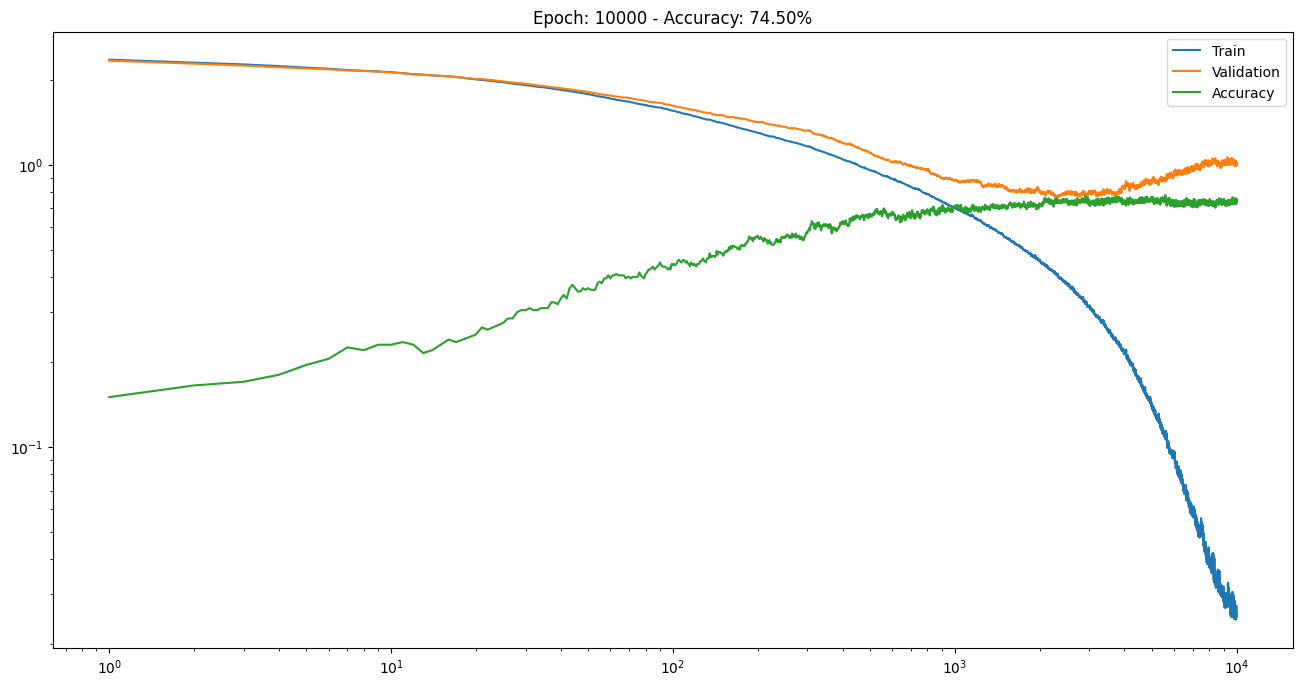

Training error: 0.025058296
Validation error: 1.0129514
Accuracy: 0.745


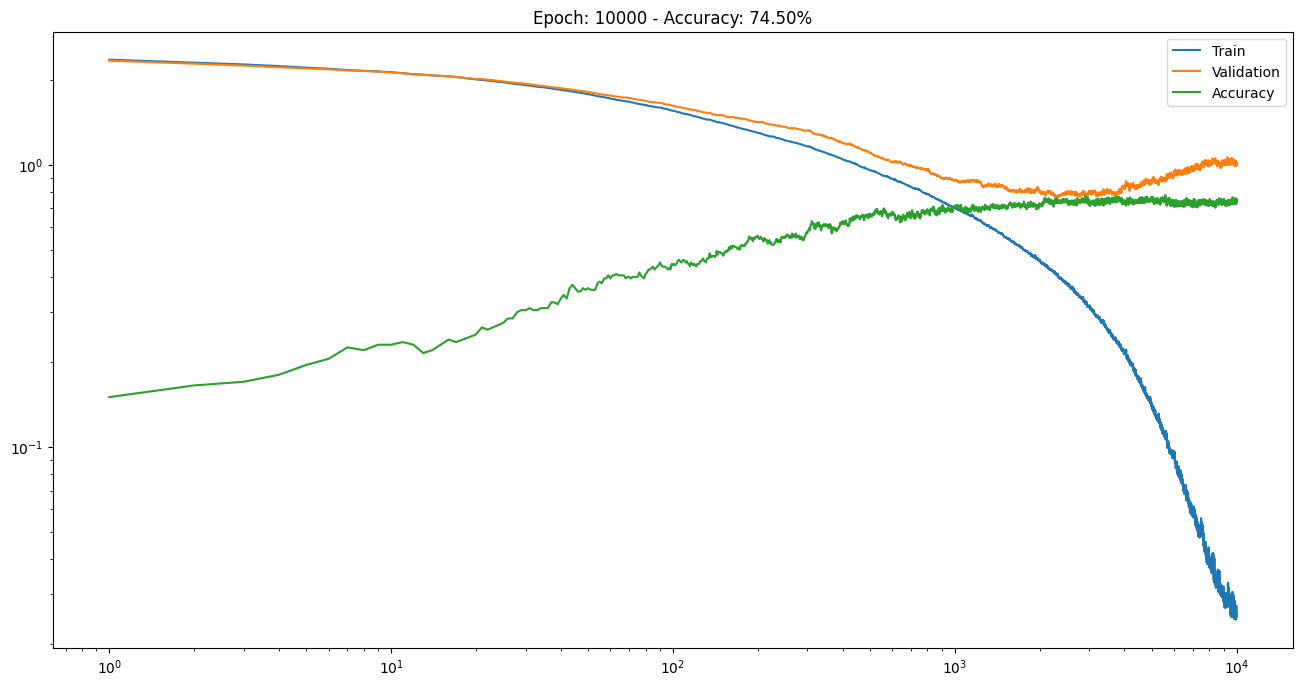

In [28]:
# Hyper-parameters
learning_rate = 5e-4
num_epochs = 10_000
minibatch_size = 10
delta = 1e-7
decay_rate = 0.9
penalization = 2.5

# Initialize parameters
layers_size = [57, 25, 25, 10]
params = initialize_params(layers_size)
num_training_samples = len(y_train)

# Keep track of the history of the training
history_train = [crossentropy_jit(X_train, y_train, params)]
history_valid = [crossentropy_jit(X_valid, y_valid, params)]
history_acc   = [acc_jit(X_valid, y_valid, params)]

# Training loop
cb = Callback(refresh_rate=100)
cumulated_square_grad = [0.0 for i in range(len(params))]
for k in trange(num_epochs):
    idxs = np.random.choice(num_training_samples, minibatch_size)
    grads = grad_jit(X_train[idxs,:], y_train[idxs,:], params, penalization)

    for i in range(len(params)):
        cumulated_square_grad[i] = decay_rate * cumulated_square_grad[i] + (1 - decay_rate) * grads[i]**2
        params[i] -= learning_rate / (delta + jnp.sqrt(cumulated_square_grad[i])) * grads[i]

    history_train.append(crossentropy_jit(X_train, y_train, params))
    history_valid.append(crossentropy_jit(X_valid, y_valid, params))
    history_acc.append(acc_jit(X_valid, y_valid, params))
    
    # Plot interactively
    cb(k)

# Print the final errors
print("Training error:", history_train[-1])
print("Validation error:", history_valid[-1])
print("Accuracy:", history_acc[-1])

# Plot the history of the errors to check the behaviour
# plt.loglog(history_train, label="Train")
# plt.loglog(history_valid, label="Validation")
# plt.loglog(history_acc, label="Accuracy")
# plt.legend()

# Testing